<a href="https://colab.research.google.com/github/mdcodigo/coder_ds/blob/main/Visualizacion_Duva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos data set de HR

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_hr= pd.read_csv("https://github.com/mdcodigo/coder_ds/raw/main/data-sources/HRDataset_v14.csv")

Estadísticas descriptivas básicas


In [2]:
df_hr.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


Histograma de Salarios

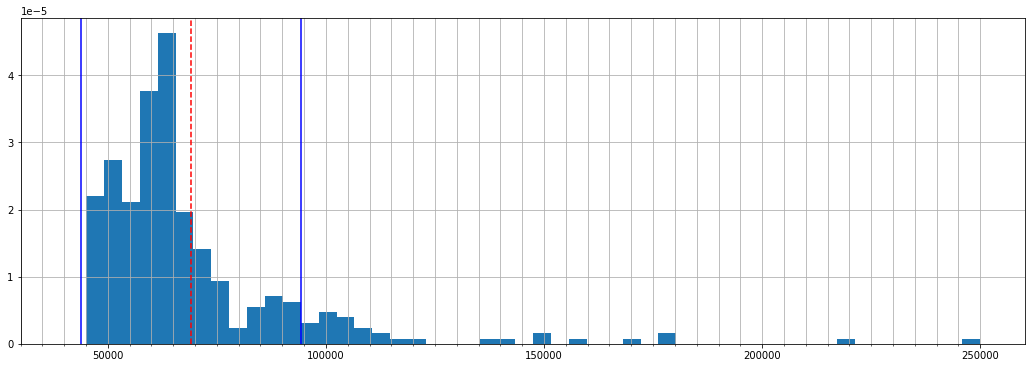

In [ ]:
SALARY_COL = "Salary"
fig, ax = plt.subplots(figsize=(18,6))

salary_mean=df_hr[SALARY_COL].mean()
salary_std=df_hr[SALARY_COL].std()

n, bins, patches = ax.hist(
    df_hr[SALARY_COL], 
    bins = 50,
    density=True)

ax.set_xticks(
    ticks=np.arange(30000,df_hr[SALARY_COL].max(),step=5000),
    minor=True)

ax.axvline(x=salary_mean, c = "red", linestyle = "--")


ax.axvline(x = salary_mean + salary_std, c= "blue")
ax.axvline(x = salary_mean - salary_std, c= "blue")

plt.grid(which="both",axis="both")

#print(bins)
#print(n)
plt.show()

1. A "ojimetro" ;) se puede apreciar que el 68% de los salarios estan en el rango de 45.000 a 95.000
2. Notas: Las líneas azules son la media menos y mas la dev. estandar


Diagrama de vilolin por genero.

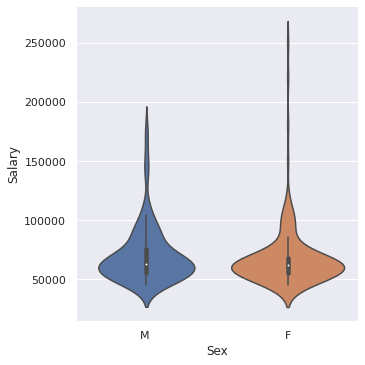

In [ ]:
GEMDER_COL = "Sex"

#salary_mean=df_hr[SALARY_COL].mean()
#salary_std=df_hr[SALARY_COL].std()

sns.set()

ax = sns.catplot(
    data=df_hr
    ,kind="violin"
    ,x=GEMDER_COL
    ,y=SALARY_COL
    #,hue="MaritalDesc"
    )



Serie de tiempo en base a DateOfHire

[]

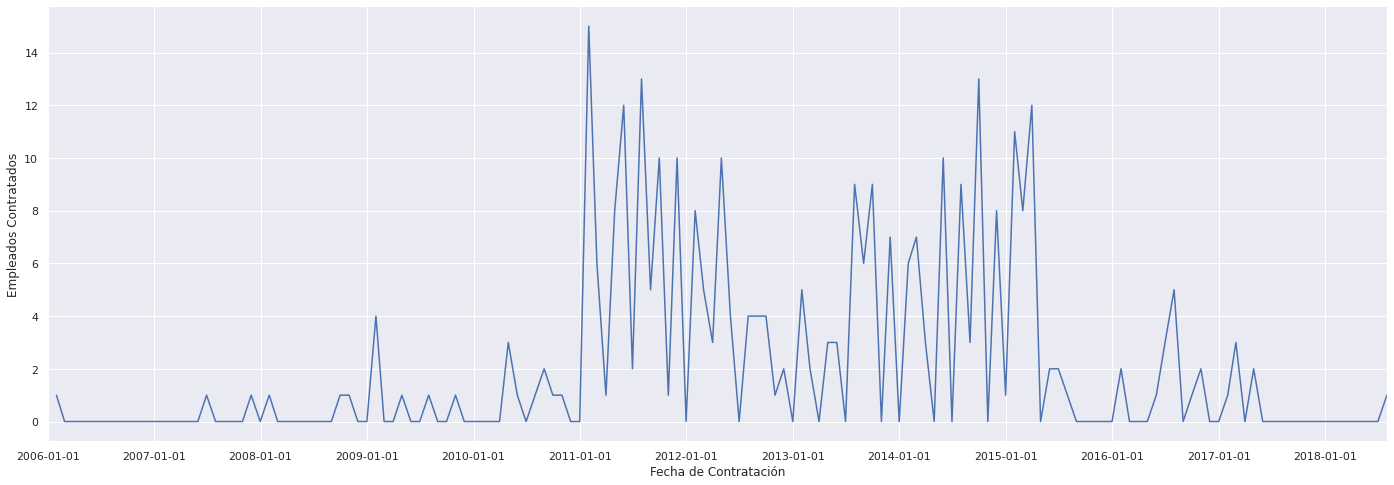

In [ ]:
df_hr2= pd.read_csv("https://github.com/mdcodigo/coder_ds/raw/main/data-sources/HRDataset_v14.csv")

df_hr2.index = pd.to_datetime(df_hr2["DateofHire"])

df_data = df_hr2.groupby(pd.Grouper(freq="M"))["EmpID"].count()

#print(df_data.index)

fig, ax = plt.subplots(figsize=(24,8))

sns.lineplot(data=df_data)

ax.set(xlabel='Fecha de Contratación', ylabel='Empleados Contratados')
ax.set_xlim(left=df_data.index.min(), right=df_data.index.max())
ax.set_xticks(
    np.arange(np.datetime64("2006-01-01"),np.datetime64("2019-01-01"), np.timedelta64(1, 'Y'),dtype='datetime64[M]')
    , minor=False)


plt.plot()
